# 1. Objective

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.  The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house
How well those variables describe the price of a house
Determine the optimal value of lambda for ridge and lasso regression


### Business Goal

Model the price of houses with the available independent variables so that this model can be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 2. Reading and Understanding the Data

**Import Libraries and packages**

In [1]:
# Import required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime as dt
import os

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

**Reading the dataset**

In [2]:
housing = pd.read_csv("train.csv", encoding='iso-8859-1')

**View the metadata**

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**View the sample data**

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check the head of the dataset
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Data Cleaning

#### Columns treatments

In [7]:
# Switching index
housing.index = housing['Id']

# Convert year attributes to age
housing['property_age'] = dt.now().year - housing['YearBuilt']
housing['remod_age'] = dt.now().year - housing['YearRemodAdd']

# Drop those columns
housing = housing.drop(['Id', 'YearBuilt', 'YearRemodAdd'],axis=1)


**Drop columns with higher null or zeros values**

In [8]:
# By looking into the sample data and as a general recommendation dropping columns with 70% null and 50% '0' values
housing = housing.loc[:, housing.isnull().mean() < .7]
housing.drop(list(housing.loc[:, (housing == 0).mean() > .5]), axis=1, inplace=True)

In [9]:
housing.shape

(1460, 63)

**Find columns with NA**

In [10]:
na_columns = housing.columns[housing.isna().any()].tolist()
print(na_columns)

['LotFrontage', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


**Columns with NA percentages**

In [11]:
(((housing[na_columns].isna()).sum() * 100 / housing.index.size).round(2)).sort_values(ascending=False)

FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
Electrical       0.07
dtype: float64

**FireplaceQu** has 47% NA values hence droping it

In [12]:
housing.drop('FireplaceQu', axis=1, inplace=True)
na_columns.remove('FireplaceQu')

**LotFrontage** has 17% NA values. This column holds numeric values hence NA values can be replaced with median

In [13]:
housing['LotFrontage'].fillna((housing['LotFrontage'].median()), inplace=True)

Finding the columns with NA or Null percentage now

In [14]:
(((housing[na_columns].isna() | housing[na_columns].isnull()).sum() * 100 
  / housing.index.size).round(2)).sort_values(ascending=False)

GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageYrBlt     5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
Electrical      0.07
LotFrontage     0.00
dtype: float64

**Following colmns or types of columns contains NA or null values:** 
* _Garage_ related
* _Bsmt_ related
* MasVnrType
* Electrical
* LotFrontage

Garage and basement related columns can be null/NA due to unavailability of these amanities. Hence changing these replaing the NA. The rows where the other 3 are NA/null can be deleted as we will loose less than 1% of rows.

In [15]:
housing = housing[housing['MasVnrType'].notna()]
housing = housing[housing['Electrical'].notna()]
housing = housing[housing['LotFrontage'].notna()]

In [16]:
na_cols = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 
           'GarageType', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

**Refilling Garage columns**

In [17]:
for col in ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']:
    housing[col].fillna('Garage_unavailable', inplace=True)
    
housing['GarageYrBlt'].fillna((housing['GarageYrBlt'].median()), inplace=True)

**Refilling Basement columns**

In [18]:
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']:
    housing[col].fillna('Basement_unavailable', inplace=True)

In [19]:
print("Shape before dropping rows", housing.shape )

Shape before dropping rows (1451, 62)


In [20]:
#housing.dropna(how='any', inplace=True, axis=0) 

In [21]:
print("Shape after dropping rows", housing.shape )

Shape after dropping rows (1451, 62)


In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 1460
Data columns (total 62 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 non-null object
ExterQual        1451 non-null object
ExterCond        1451 

In [23]:
# Segregate columns to categorical and continous based on value counts
def segregate_columns(df=housing, n=10):
    segregation = [{ 
                    "col":c,
                    "col_type": 'continuous' if df[c].nunique()>n else 'categorical',
                    "unique_count":df[c].nunique()
                   } for c in df.columns ]
    
    return pd.DataFrame.from_records(segregation)

In [24]:
housing_columns = segregate_columns()
housing_columns

,col,col_type,unique_count
0,MSSubClass,continuous,15
1,MSZoning,categorical,5
2,LotFrontage,continuous,110
3,LotArea,continuous,1066
4,Street,categorical,2
5,LotShape,categorical,4
6,LandContour,categorical,4
7,Utilities,categorical,2
8,LotConfig,categorical,5
9,LandSlope,categorical,3


In [25]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age,remod_age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,2,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,61,2,2008,WD,Normal,208500,17,17
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,2,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,5,2007,WD,Normal,181500,44,44
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,2,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,42,9,2008,WD,Normal,223500,19,18
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,1,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000,105,50
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,2,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,84,12,2008,WD,Normal,250000,20,20


### Data Exploration : Continuous Variables

In [26]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice,property_age,remod_age
Id,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,706,150,856,856,1710,2,3,1,8,0,2003.0,2,548,61,2,2008,208500,17,17
2,20,80.0,9600,6,8,978,284,1262,1262,1262,2,3,1,6,1,1976.0,2,460,0,5,2007,181500,44,44
3,60,68.0,11250,7,5,486,434,920,920,1786,2,3,1,6,1,2001.0,2,608,42,9,2008,223500,19,18
4,70,60.0,9550,7,5,216,540,756,961,1717,1,3,1,7,1,1998.0,3,642,35,2,2006,140000,105,50
5,60,84.0,14260,8,5,655,490,1145,1145,2198,2,4,1,9,1,2000.0,3,836,84,12,2008,250000,20,20


In [27]:
housing_numeric.nunique()

MSSubClass        15
LotFrontage      110
LotArea         1066
OverallQual       10
OverallCond        9
BsmtFinSF1       633
BsmtUnfSF        777
TotalBsmtSF      717
1stFlrSF         748
GrLivArea        858
FullBath           4
BedroomAbvGr       8
KitchenAbvGr       4
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       438
OpenPorchSF      201
MoSold            12
YrSold             5
SalePrice        657
property_age     112
remod_age         61
dtype: int64

**As several of the columns which even holds numeric values are having fixed discreate values. Hence those are not categorical. Excluding those and picking only the real continous variables**

In [28]:
housing_cont = housing_numeric[['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 
                                'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 
                                'OpenPorchSF', 'property_age', 'remod_age', 'SalePrice']]
housing_cont.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,OpenPorchSF,property_age,remod_age,SalePrice
Id,,,,,,,,,,,,,,
1,60,65.0,8450,706,150,856,856,1710,2003.0,548,61,17,17,208500
2,20,80.0,9600,978,284,1262,1262,1262,1976.0,460,0,44,44,181500
3,60,68.0,11250,486,434,920,920,1786,2001.0,608,42,19,18,223500
4,70,60.0,9550,216,540,756,961,1717,1998.0,642,35,105,50,140000
5,60,84.0,14260,655,490,1145,1145,2198,2000.0,836,84,20,20,250000


Make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

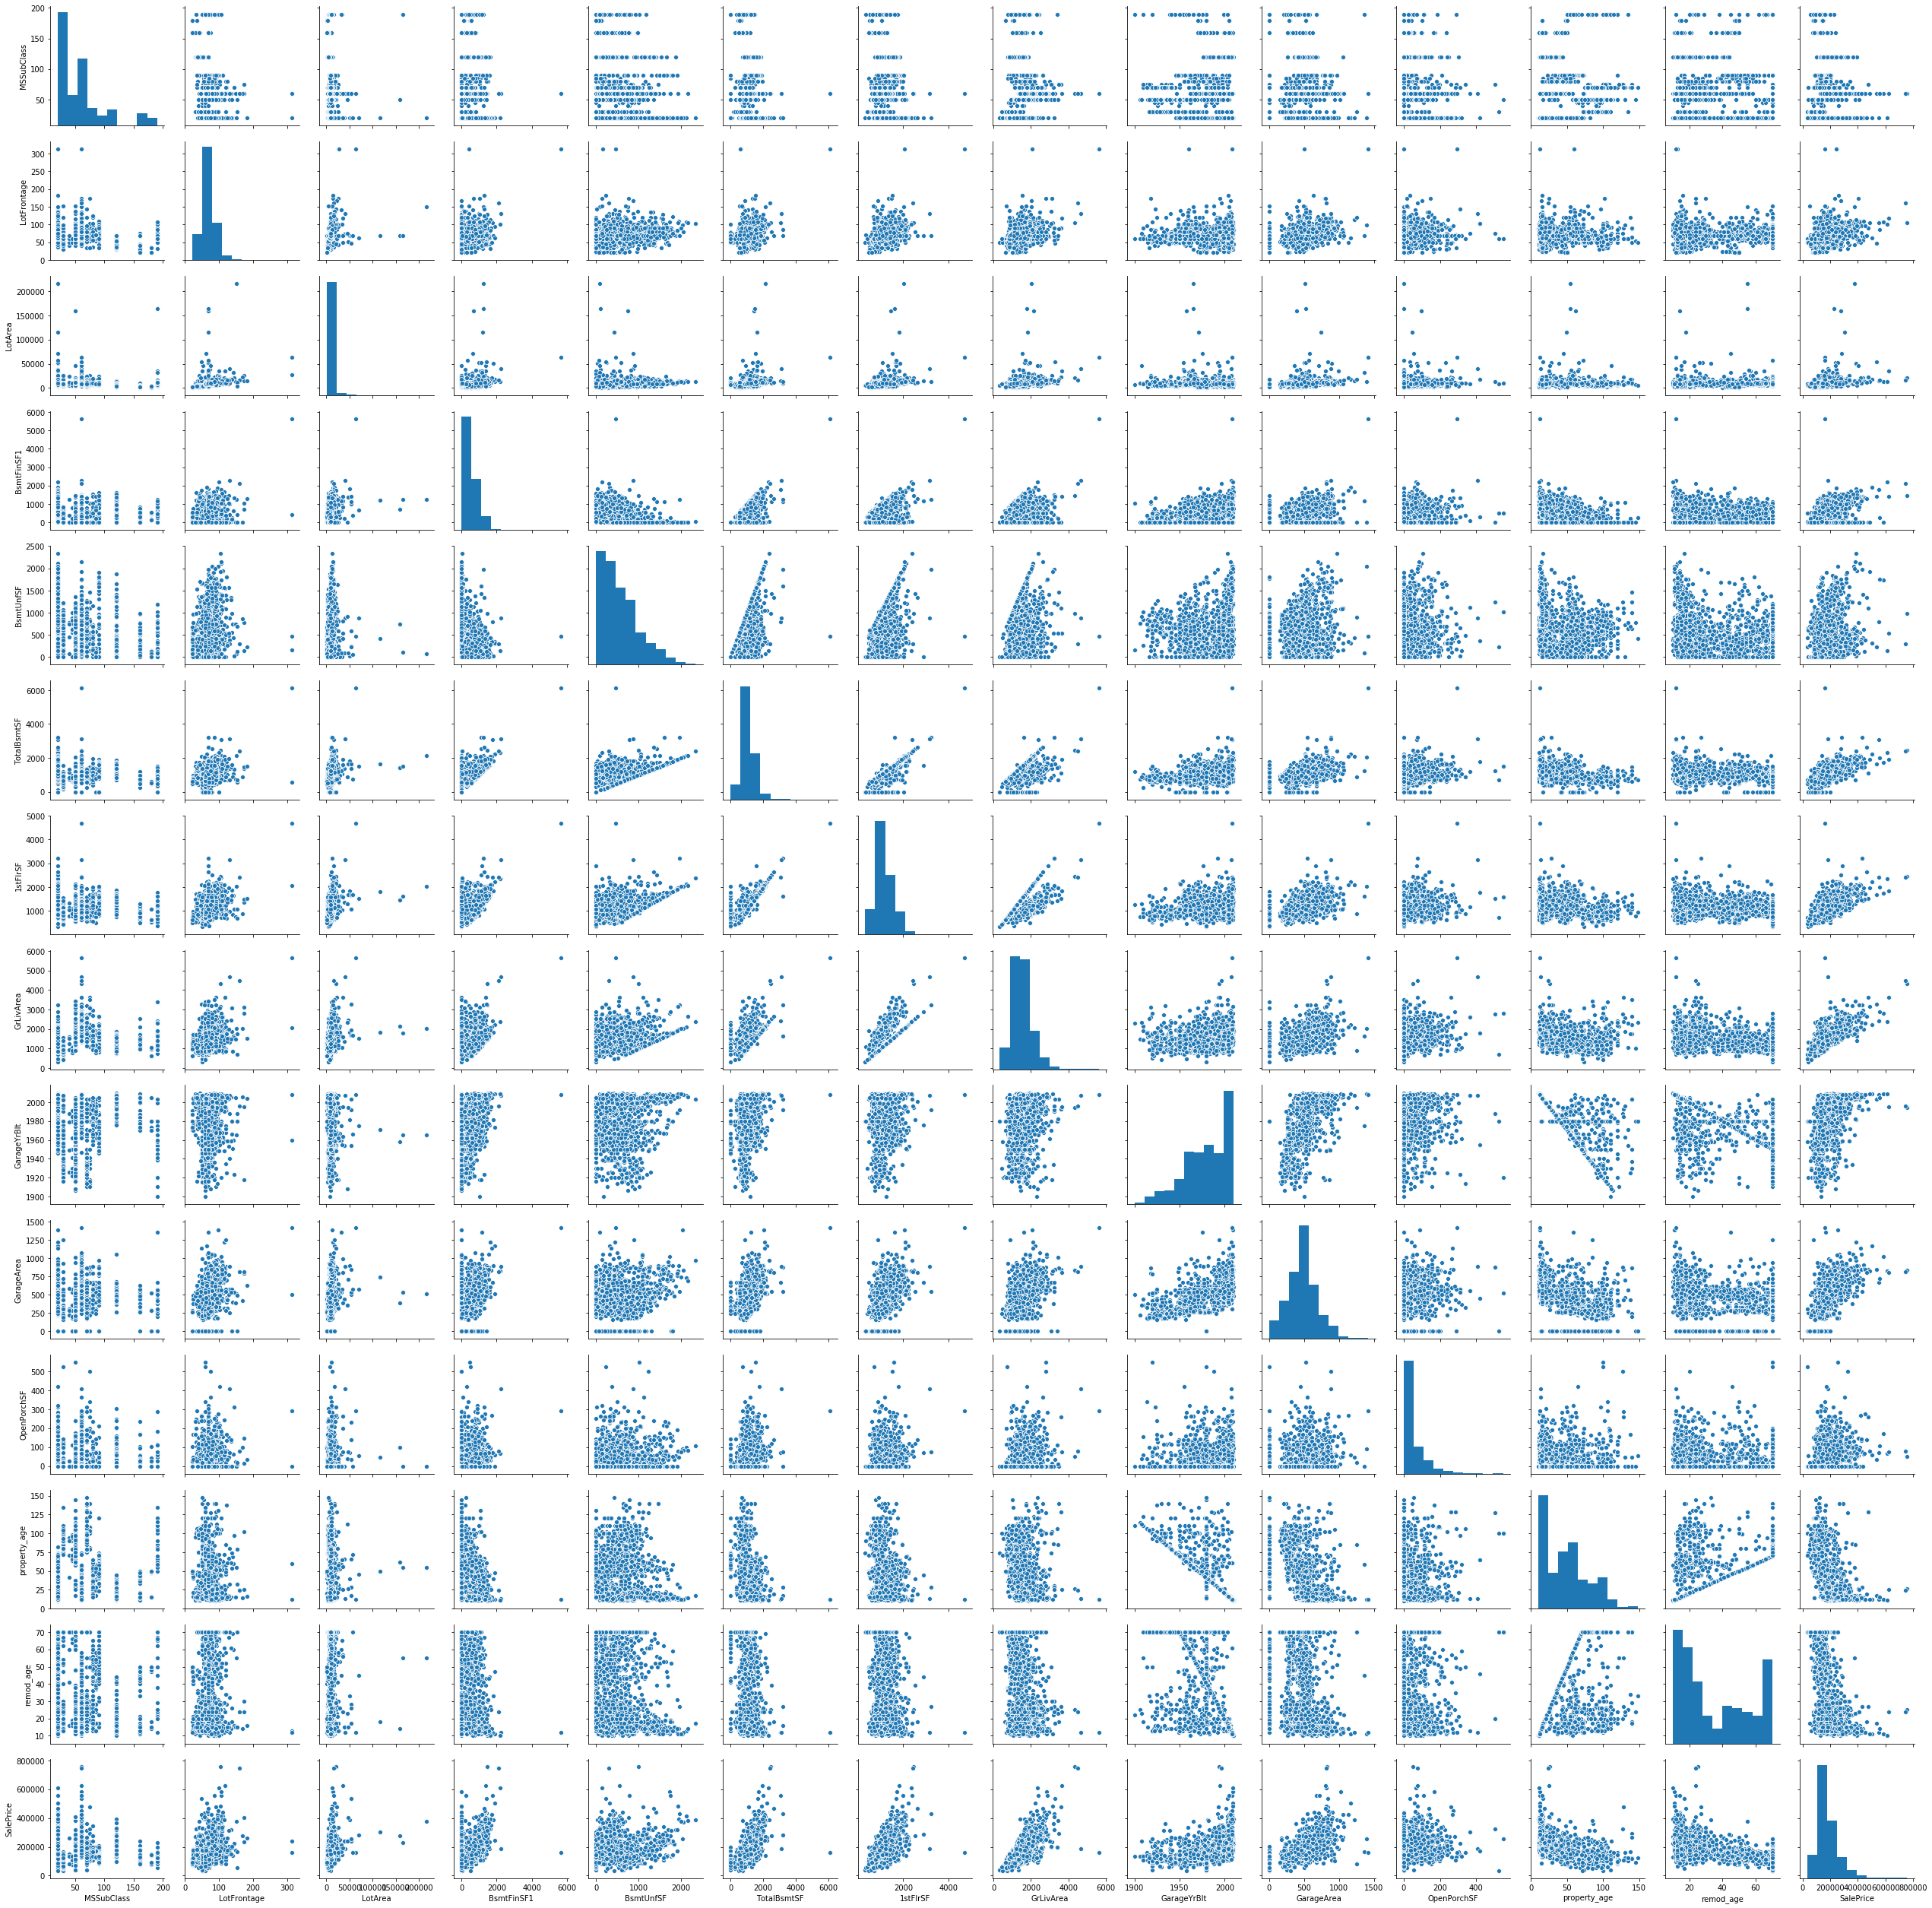

In [29]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(housing_cont)
plt.show()

In [30]:
# correlation matrix
cor = housing_cont.corr()
cor

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,OpenPorchSF,property_age,remod_age,SalePrice
MSSubClass,1.000000,-0.355068,-0.138039,-0.069241,-0.138789,-0.236547,-0.249775,0.077025,0.081531,-0.098027,-0.005200,-0.027979,-0.040664,-0.082760
LotFrontage,-0.355068,1.000000,0.304694,0.215778,0.121921,0.363310,0.414725,0.368035,0.062871,0.323181,0.134766,-0.116365,-0.082885,0.333206
LotArea,-0.138039,0.304694,1.000000,0.213081,-0.004250,0.258538,0.295977,0.261152,-0.024735,0.180767,0.086278,-0.015708,-0.015190,0.264668
BsmtFinSF1,-0.069241,0.215778,0.213081,1.000000,-0.496605,0.520098,0.442838,0.205944,0.148844,0.295374,0.107279,-0.250209,-0.128422,0.383995
BsmtUnfSF,-0.138789,0.121921,-0.004250,-0.496605,1.000000,0.415900,0.318053,0.240770,0.187011,0.183865,0.130046,-0.150218,-0.182219,0.215707
TotalBsmtSF,-0.236547,0.363310,0.258538,0.520098,0.415900,1.000000,0.818107,0.453975,0.311821,0.486298,0.244411,-0.394285,-0.292985,0.613299
1stFlrSF,-0.249775,0.414725,0.295977,0.442838,0.318053,0.818107,1.000000,0.565895,0.227913,0.490839,0.210229,-0.285655,-0.243464,0.606969
GrLivArea,0.077025,0.368035,0.261152,0.205944,0.240770,0.453975,0.565895,1.000000,0.220890,0.469396,0.330746,-0.199621,-0.288569,0.710073
GarageYrBlt,0.081531,0.062871,-0.024735,0.148844,0.187011,0.311821,0.227913,0.220890,1.000000,0.471315,0.215681,-0.776825,-0.614710,0.467779
GarageArea,-0.098027,0.323181,0.180767,0.295374,0.183865,0.486298,0.490839,0.469396,0.471315,1.000000,0.238781,-0.478948,-0.371088,0.622484


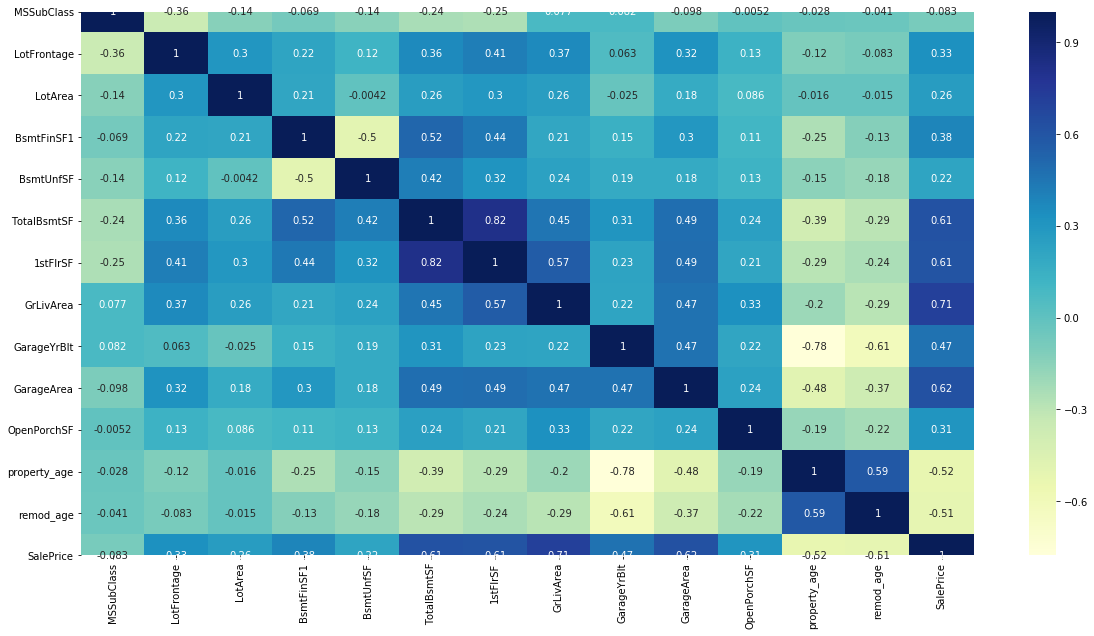

In [31]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

**Insights from the HeatMap and corelation matrix**
* SalesPrice has significant positive relatationship with GrLivArea, GarageArea, 1stFlrSF and TotalBsmtSF and it's increasing with increase of these.

* On the other hand SalesPrice has negative relationship with the property_age and remod_age. i.e. when the property is older or it's remodling is old the price is depreciating.

* Some of the variables are highly co-related e.g. (1stFlrSF and TotalBsmtSF), (prop_age and remod_age), (GarageYrBlt, GarageYrBlt) and (BsmtFinSF1 and TotalBsmtSF).

### Data Exploration : Categorical variables

In [32]:
housing_categorical_vars = housing_columns[housing_columns['col_type']=='categorical']['col'].tolist()
print(housing_categorical_vars)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


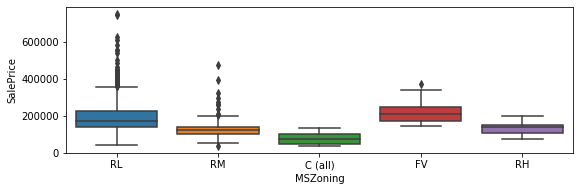

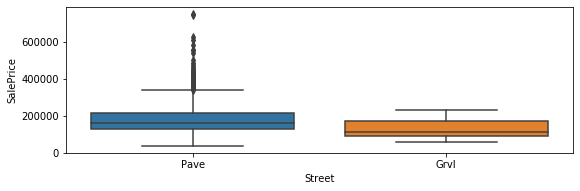

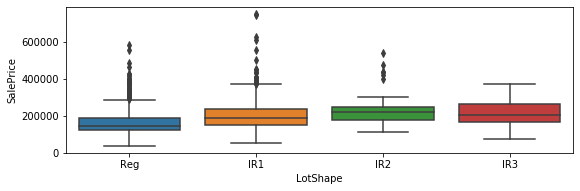

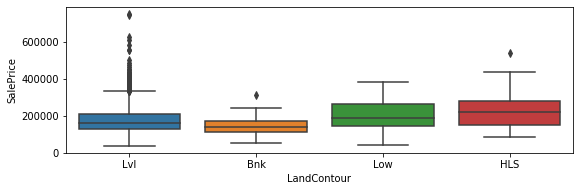

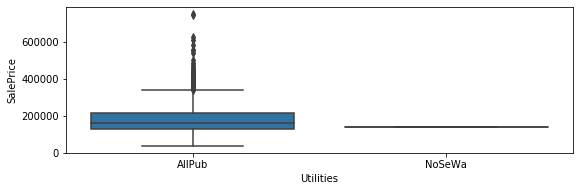

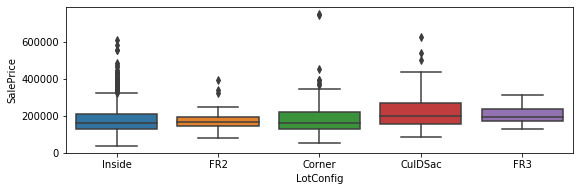

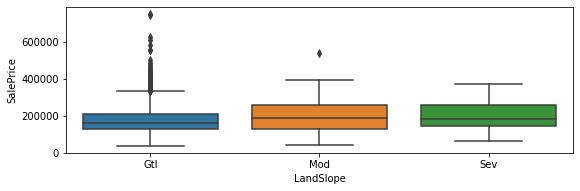

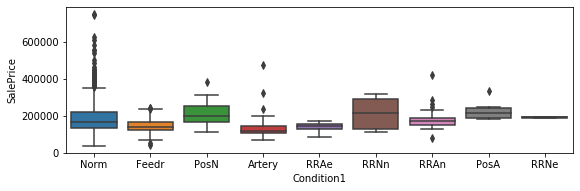

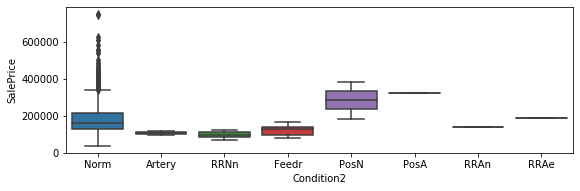

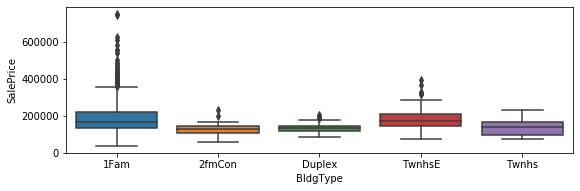

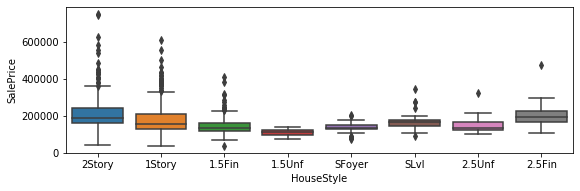

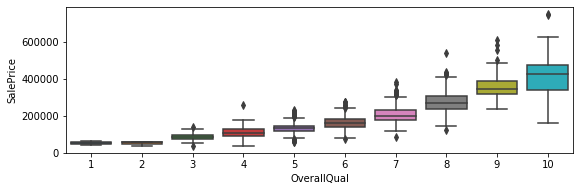

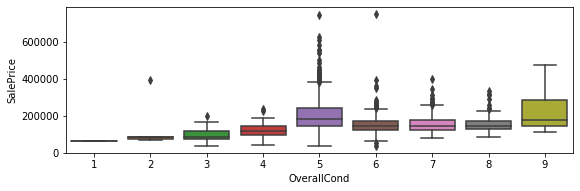

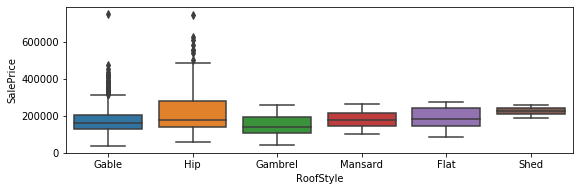

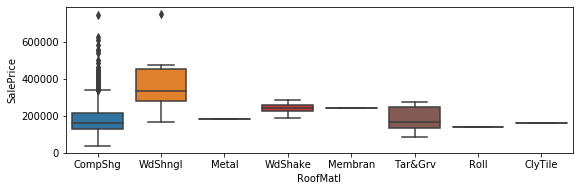

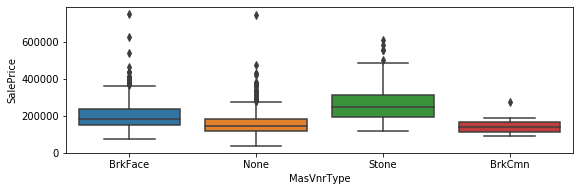

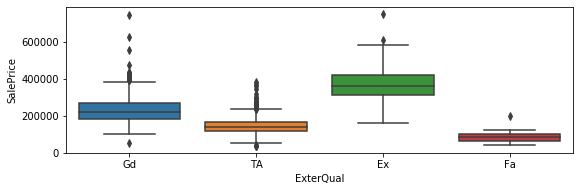

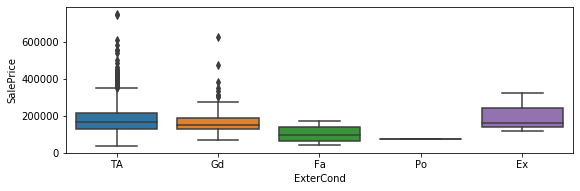

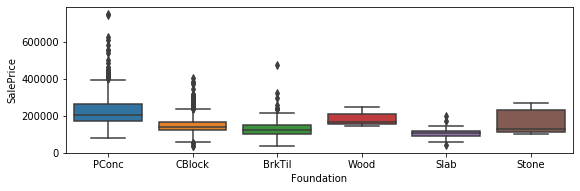

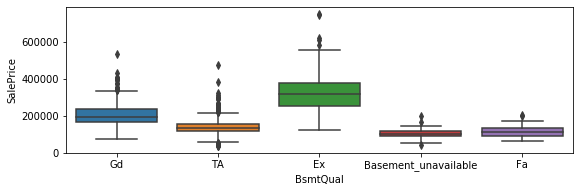

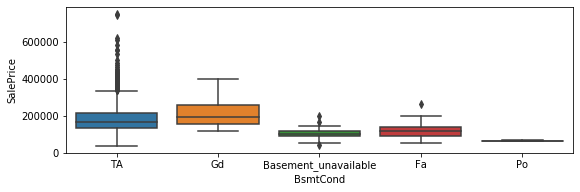

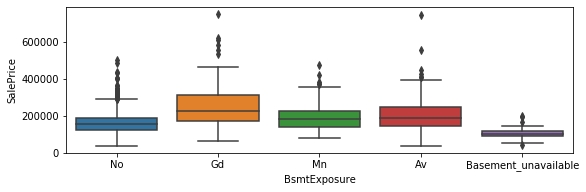

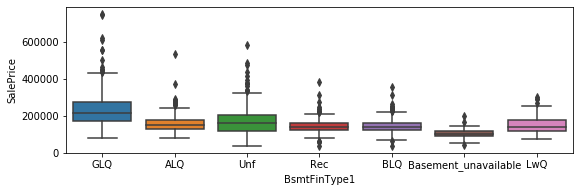

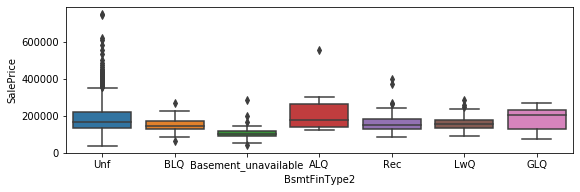

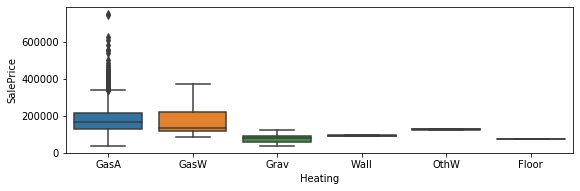

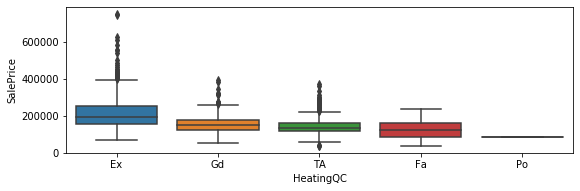

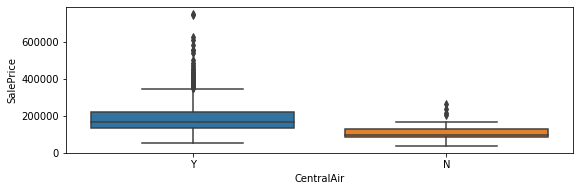

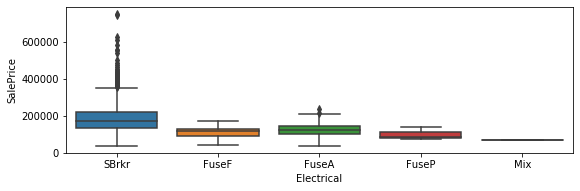

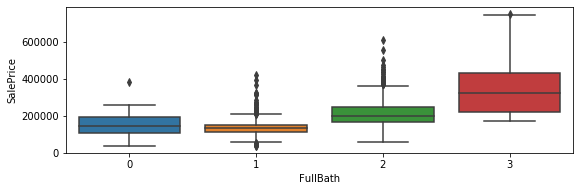

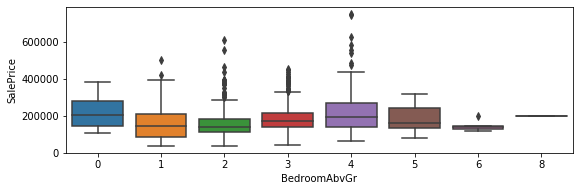

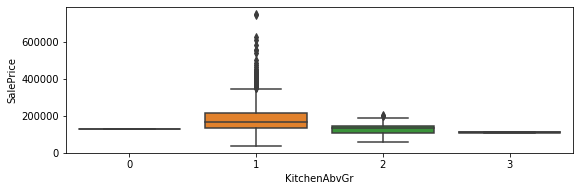

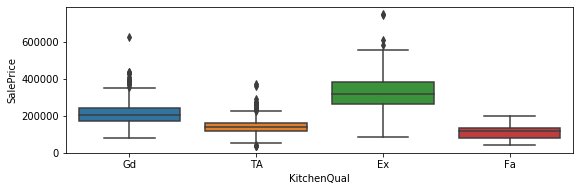

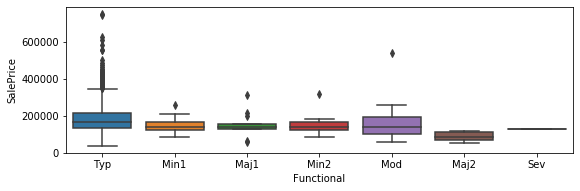

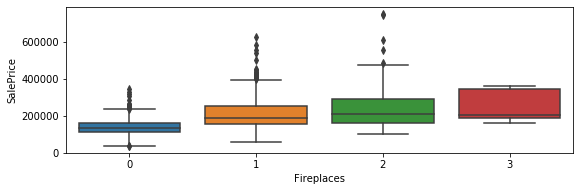

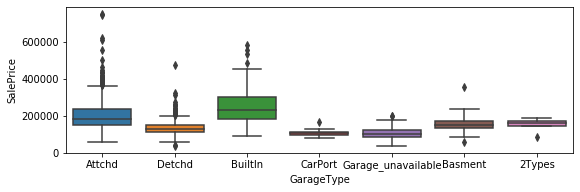

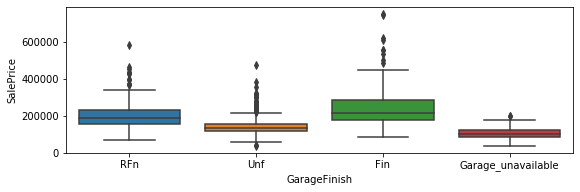

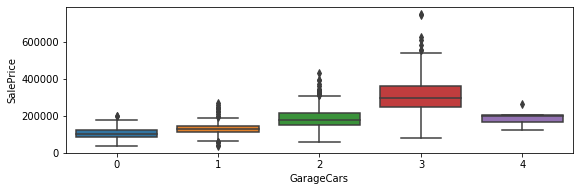

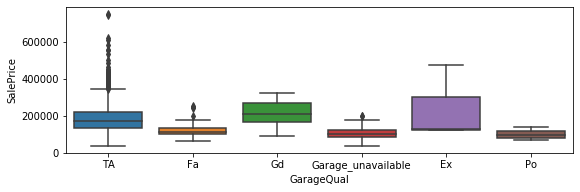

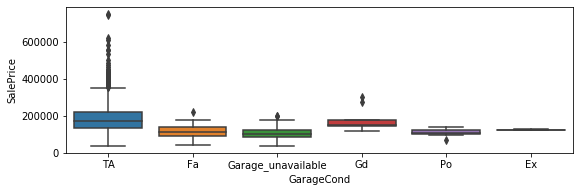

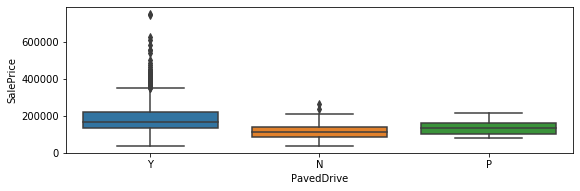

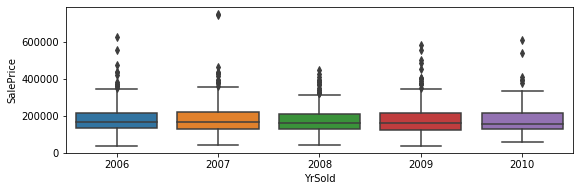

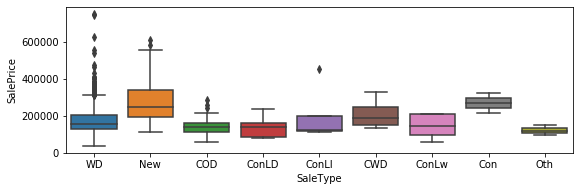

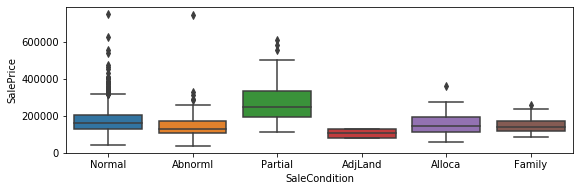

In [33]:
def drawCategorical():
    n = 1
    for item in housing_categorical_vars:
        plt.figure(figsize=(20, 80))
        plt.subplot(25,2,n)
        sns.boxplot(x = item, y = 'SalePrice', data = housing)
        plt.show()
        n = n+1
        
drawCategorical()

# 4. Data Preparation

In [34]:
# Split the data into X and y
y = housing.pop('SalePrice')
X = housing

In [35]:
# Non numeric variables. 
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [36]:
housing_categorical.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [37]:
housing_categorical = housing_categorical.drop(['Neighborhood'], axis=1)

In [38]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Basement_unavailable,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_Basement_unavailable,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_Basement_unavailable,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Garage_unavailable,GarageFinish_Garage_unavailable,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Garage_unavailable,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Garage_unavailable,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,

In [39]:
# drop Neighborhood from categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)
X = X.drop('Neighborhood', axis =1)

In [40]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [41]:
X.shape

(1451, 204)

In [42]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=204)

#### Splitting the data

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# 3. Model Building and Evaluation

## Ridge Regression

In [44]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005146,0.003424,0.000928,0.000152,0.0001,{'alpha': 0.0001},-25028.766696,-15189.672428,-24104.008230,-23130.179874,-20996.788134,-21689.883073,3515.216011,28,-12926.109886,-13958.119751,-13284.988665,-13569.945257,-12766.832394,-13301.199191,431.340170
1,0.003097,0.000287,0.000872,0.000160,0.001,{'alpha': 0.001},-25028.595986,-15189.357643,-24103.587691,-23129.052577,-20996.415728,-21689.401925,3515.164560,27,-12926.146356,-13958.167121,-13284.980218,-13570.037095,-12766.933124,-13301.252783,431.334807
2,0.002599,0.000338,0.000767,0.000069,0.01,{'alpha': 0.01},-25026.899281,-15186.215026,-24099.383913,-23117.884943,-20992.715675,-21684.619768,3514.659664,26,-12926.507353,-13958.636383,-13284.893354,-13570.926222,-12767.934811,-13301.779624,431.278425
3,0.002703,0.000306,0.000805,0.000109,0.05,{'alpha': 0.05},-25019.573564,-15172.655528,-24080.735807,-23070.304116,-20976.778245,-21664.009452,3512.492106,25,-12928.034739,-13961.198904,-13284.969438,-13574.320873,-12772.425173,-13304.189825,431.107279
4,0.002879,0.000271,0.000786,0.000058,0.1,{'alpha': 0.1},-25010.984123,-15165.306422,-24057.506223,-23014.631683,-20958.440649,-21641.373820,3506.669451,24,-12929.785223,-13964.544673,-13285.427875,-13578.608583,-12777.896377,-13307.252546,431.008791


In [46]:
def topCoeff(algo, n=5):
    df = pd.DataFrame(list(zip(X_train.columns, algo.coef_)), columns=['column', 'coeff'])
    df = df[df['coeff'] != 0].sort_values(by='coeff', ascending=False)
    print(df.head(n))

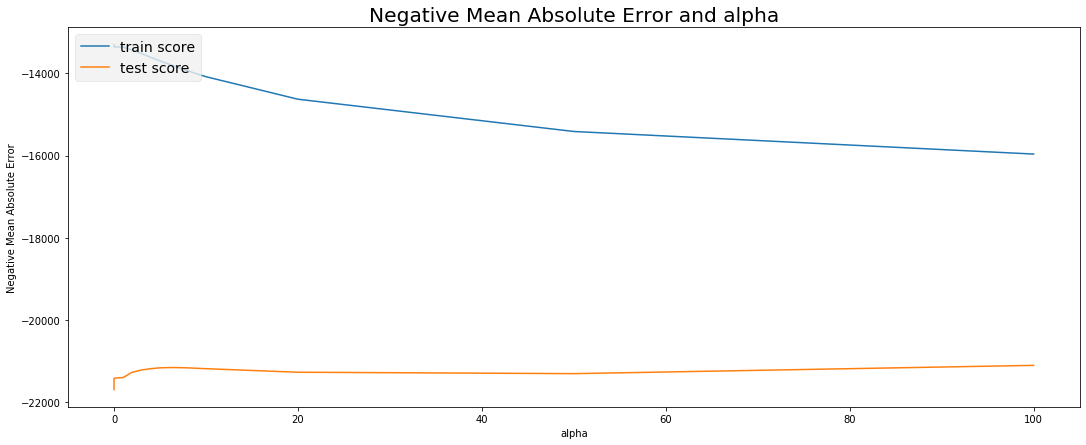

In [47]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(15, 6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Ridge Results  

In [48]:
alpha_ridge = model_cv.best_params_['alpha']
print('alpha for Ridge:', alpha_ridge)
ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print('R2 on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print('R2 on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))
topCoeff(ridge)

alpha for Ridge: 500
R2 on train set:  0.8626394540926937
R2 on test set:  0.824574865297
           column         coeff
3     OverallQual  10173.441412
9       GrLivArea  10127.970155
123   BsmtQual_Ex   7780.562198
13   TotRmsAbvGrd   6000.680020
16     GarageCars   5813.228410


### Ridge Results if alpha is doubled

In [49]:
ridge = Ridge(alpha=2*alpha_ridge)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print('R2 on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print('R2 on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))
topCoeff(ridge)

R2 on train set:  0.8388455764989922
R2 on test set:  0.8133316727823401
           column        coeff
3     OverallQual  8157.548130
9       GrLivArea  8054.013792
123   BsmtQual_Ex  6697.760235
13   TotRmsAbvGrd  5466.519508
16     GarageCars  4802.286049


## Lasso Regression

In [50]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075807,0.003997,0.001044,0.000115,0.0001,{'alpha': 0.0001},-25024.429541,-15033.266784,-24298.060238,-22902.027488,-21075.556446,-21666.668099,3579.841485,28,-12930.254330,-13968.547635,-13289.486783,-13593.691742,-12771.902436,-13310.776585,435.508790
1,0.076342,0.002327,0.001039,0.000187,0.001,{'alpha': 0.001},-25024.441438,-15033.226054,-24297.933541,-22902.020907,-21075.502092,-21666.624806,3579.841527,27,-12930.254666,-13968.550808,-13289.486356,-13593.692613,-12771.905224,-13310.777933,435.509117
2,0.122942,0.048432,0.001498,0.000758,0.01,{'alpha': 0.01},-25024.560421,-15032.818773,-24296.666563,-22901.953391,-21074.958826,-21666.191595,3579.841844,26,-12930.260458,-13968.582788,-13289.489303,-13593.707427,-12771.934424,-13310.794880,435.512435
3,0.071479,0.004055,0.001016,0.000091,0.05,{'alpha': 0.05},-25025.089517,-15031.009048,-24291.035311,-22901.624155,-21072.552171,-21664.262041,3579.841616,25,-12930.322978,-13968.732289,-13289.523442,-13593.797315,-12772.117401,-13310.898685,435.512739
4,0.077119,0.005987,0.001053,0.000140,0.1,{'alpha': 0.1},-25025.750521,-15028.664036,-24283.995663,-22901.186645,-21069.579326,-21661.835238,3579.870682,24,-12930.407224,-13968.914641,-13289.573451,-13593.911643,-12772.370262,-13311.035444,435.504907


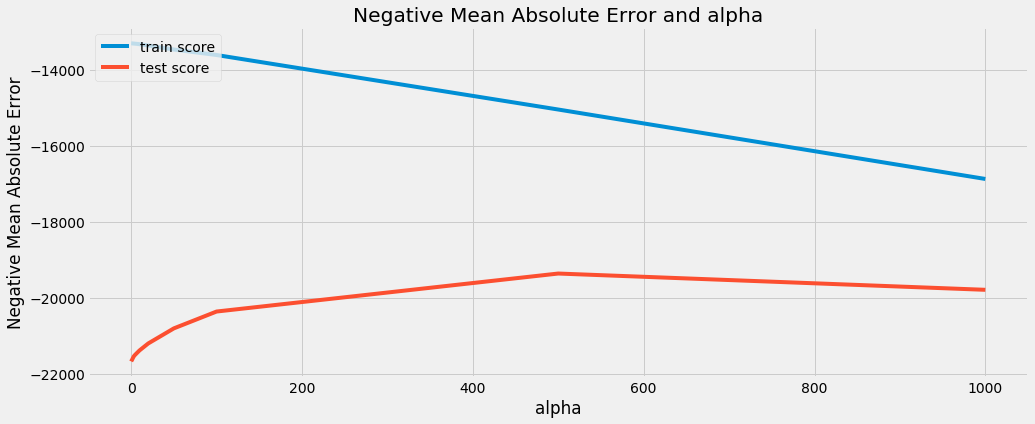

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(15,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Lasso Results

In [53]:
alpha_lasso = model_cv.best_params_['alpha']
print('alpha for lasso: ', alpha_lasso)
lasso = Lasso(alpha=alpha_lasso)

lasso.fit(X_train, y_train)

# predict
y_train_pred_lasso = lasso.predict(X_train)
print('R2 on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred_lasso))

y_test_pred_lasso = lasso.predict(X_test)
print('R2 on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

print('Total co-efficients:', len(lasso.coef_))
print('Removed co-efficients:', list(lasso.coef_).count(0))
topCoeff(lasso)

alpha for lasso:  500
R2 on train set:  0.9091157298850557
R2 on test set:  0.7797330635042213
Total co-efficients: 204
Removed co-efficients: 100
              column         coeff
72  RoofMatl_CompShg  40043.114988
9          GrLivArea  34214.875938
76  RoofMatl_Tar&Grv  24410.837048
78  RoofMatl_WdShngl  20788.975398
3        OverallQual  16481.075986


### Lasso Results if Alpha is doubled

In [54]:
lasso = Lasso(alpha=2*alpha_lasso)
lasso.fit(X_train, y_train)

# predict
y_train_pred_lasso = lasso.predict(X_train)
print('R2 on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred_lasso))

y_test_pred_lasso = lasso.predict(X_test)
print('R2 on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred_lasso))
topCoeff(lasso)

R2 on train set:  0.8757478129188836
R2 on test set:  0.8135831825374447
              column         coeff
9          GrLivArea  28577.169665
3        OverallQual  19435.655618
123      BsmtQual_Ex  10599.691681
16        GarageCars   9452.381834
132  BsmtExposure_Gd   4318.202156


In [55]:
topCoeff(ridge)

           column        coeff
3     OverallQual  8157.548130
9       GrLivArea  8054.013792
123   BsmtQual_Ex  6697.760235
13   TotRmsAbvGrd  5466.519508
16     GarageCars  4802.286049


#### Top Co-efficients in Reidge

#### Top Co-efficients in Lasso

In [56]:
topCoeff(lasso)

              column         coeff
9          GrLivArea  28577.169665
3        OverallQual  19435.655618
123      BsmtQual_Ex  10599.691681
16        GarageCars   9452.381834
132  BsmtExposure_Gd   4318.202156


### Subjective Questions -3

In [57]:
# Updating X_train and X_test to remove the previous significant variables

top_lasso_var = ['RoofMatl_CompShg', 'GrLivArea', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'OverallQual']

X_train = X_train.drop(top_lasso_var, axis=1)

X_test = X_test.drop(top_lasso_var, axis=1)

alpha_lasso_2 = model_cv.best_params_['alpha']
print('alpha for lasso: ', alpha_lasso_2)
lasso2 = Lasso(alpha=alpha_lasso_2)

lasso2.fit(X_train, y_train)

# predict
y_train_pred_lasso2 = lasso2.predict(X_train)
print('R2 on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred_lasso2))

y_test_pred_lasso2 = lasso2.predict(X_test)
print('R2 on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred_lasso2))

print('Total co-efficients:', len(lasso2.coef_))
print('Removed co-efficients:', list(lasso2.coef_).count(0))
topCoeff(lasso2)

alpha for lasso:  500
R2 on train set:  0.8586820421011117
R2 on test set:  0.7879208005581225
Total co-efficients: 199
Removed co-efficients: 89
               column         coeff
7            1stFlrSF  16817.800003
14         GarageCars  14239.852131
118       BsmtQual_Ex  12693.028867
11       TotRmsAbvGrd  11116.565672
132  BsmtFinType1_GLQ   6193.081820
